In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA


train_data = np.load("train_data.npy")
train_labels = np.load("train_labels.npy")

# 轉換為 DataFrame
df = pd.DataFrame(train_data)
df['label'] = train_labels  # 添加標籤列


In [2]:
df

,0,1,2,3,4,5,6,7,8,9,...,61,62,63,64,65,66,67,68,69,label
0,0.853843,-0.709693,0.142649,-0.176952,0.117582,-0.152395,1.207672,0.245734,1.924513,0.601621,...,0.000000,0.255428,3.080873,0.255428,-1.787995,0.201544,0.352000,0.393182,0.055556,1
1,1.128771,-0.029401,0.142649,-0.176952,0.117582,-0.152395,1.001865,1.037051,0.440938,0.447094,...,0.000000,0.255428,3.080873,0.255428,-1.787995,0.201544,0.352000,0.393182,0.055556,1
2,0.760572,-0.029401,0.142649,-0.176952,0.117582,-0.152395,0.433292,0.068885,0.908483,1.140838,...,0.000000,0.255428,3.080873,0.255428,-1.787995,0.201544,0.352000,0.393182,0.055556,0
3,1.114048,-0.029401,0.142649,-0.172883,0.117582,-0.152395,0.060256,0.198770,0.098029,0.820122,...,0.000000,0.255428,3.080873,0.255428,-1.787995,0.201544,0.352000,0.393182,0.055556,0
4,0.448862,-0.029401,0.142649,-0.176952,0.117582,-0.152395,1.321162,0.342947,1.146333,1.163741,...,0.000000,0.255428,3.080873,0.255428,-1.787995,0.201544,0.352000,0.393182,0.055556,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1174456,-0.129721,-0.786425,-0.241619,0.069267,-0.175944,0.029027,0.754470,-0.211944,0.696303,-1.608424,...,-0.124224,-0.496894,2.496879,0.000000,-9.937888,3.961347,0.237263,0.355828,0.031489,1
1174457,1.884997,0.018018,-0.241619,0.069267,1.691313,-1.663993,0.754470,0.379784,1.729425,-0.464348,...,-0.124224,-0.496894,2.496879,0.000000,-9.937888,3.961347,0.237263,0.355828,0.031489,1
1174458,0.328971,-0.786425,-0.241619,0.069267,-0.175944,0.029027,-1.562018,-0.681625,0.329797,1.898219,...,-0.124224,-0.496894,2.496879,0.000000,-9.937888,3.961347,0.237263,0.355828,0.031489,1
1174459,0.328971,1.541642,-0.241619,0.069267,-0.175944,0.029027,-1.562018,-1.484551,-0.186764,1.211692,...,-0.124224,-0.496894,2.496879,0.000000,-9.937888,3.961347,0.237263,0.355828,0.031489,1


### EDA 

In [3]:

print(df.describe())

print(df.isnull().sum().sum())    # non Null 


                  0             1             2             3             4  \
count  1.174461e+06  1.174461e+06  1.174461e+06  1.174461e+06  1.174461e+06   
mean  -6.409919e-18  5.233205e-19 -5.826099e-18 -8.678650e-18 -4.416462e-19   
std    9.999996e-01  9.999996e-01  9.999996e-01  9.999851e-01  9.999996e-01   
min   -4.102287e+00 -6.799062e+00 -1.887302e+01 -1.348667e+01 -1.822159e+01   
25%   -8.101618e-01 -1.169213e-01  8.848725e-02 -1.783861e-01  7.723455e-02   
50%   -2.599778e-02  9.885173e-03  1.223657e-01 -1.576135e-01  1.085928e-01   
75%    8.136891e-01  8.379745e-02  1.484969e-01 -1.352318e-01  1.349873e-01   
max    4.071282e+00  6.882453e+00  1.567632e+01  1.915106e+01  1.583950e+01   

                  5             6             7             8             9  \
count  1.174461e+06  1.174461e+06  1.174461e+06  1.174461e+06  1.174461e+06   
mean  -2.683908e-18  4.307563e-18 -1.709110e-17 -4.106704e-17 -1.318889e-18   
std    9.999945e-01  9.999996e-01  9.999996e-01  9.

Label distribution
- None balanced --> 加權分類器
    - SMOTE  

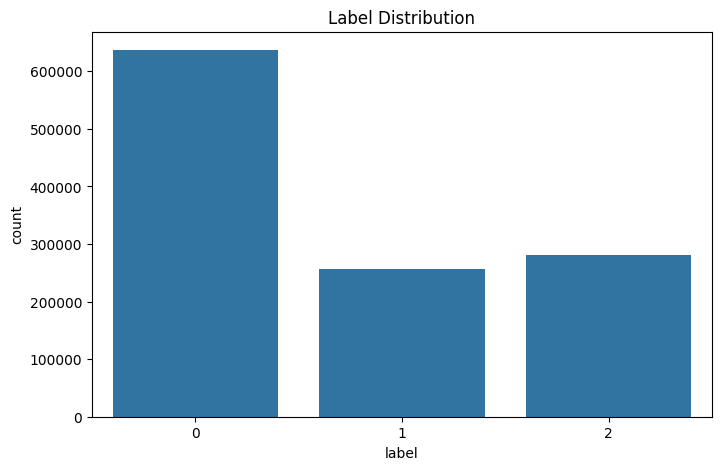

In [4]:
plt.figure(figsize=(8,5))
sns.countplot(x=df['label'])
plt.title("Label Distribution")
plt.show()


Feature corr 
- high corr : potential issue for multicolliniarity 
- high corr pair : 
    

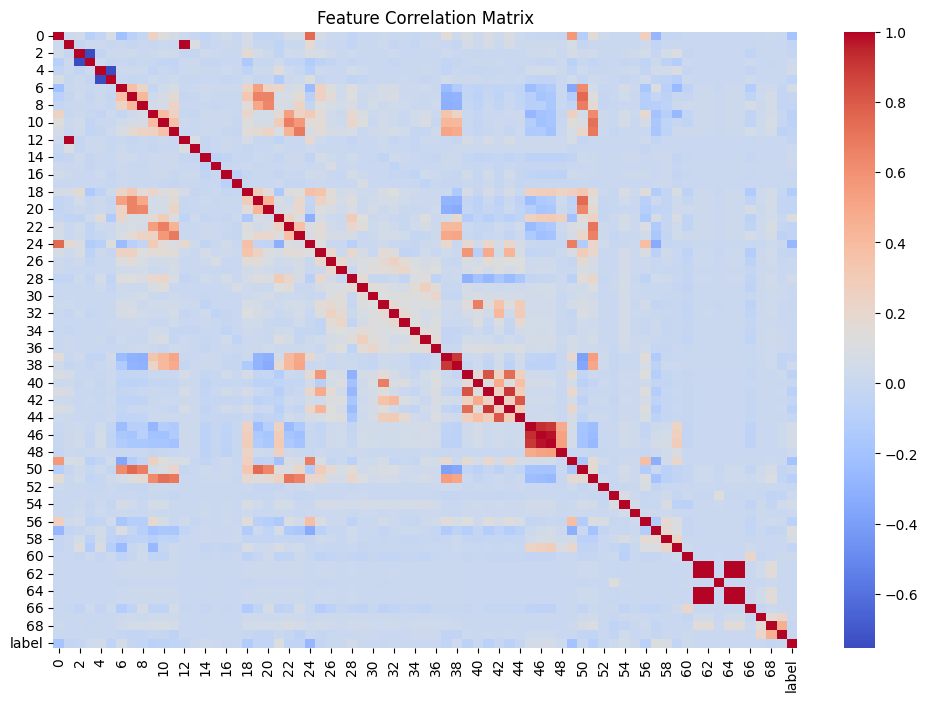

In [5]:
plt.figure(figsize=(12,8))
corr = df.corr()
sns.heatmap(corr, cmap="coolwarm", annot=False)
plt.title("Feature Correlation Matrix")
plt.show()


 Feature distribution 

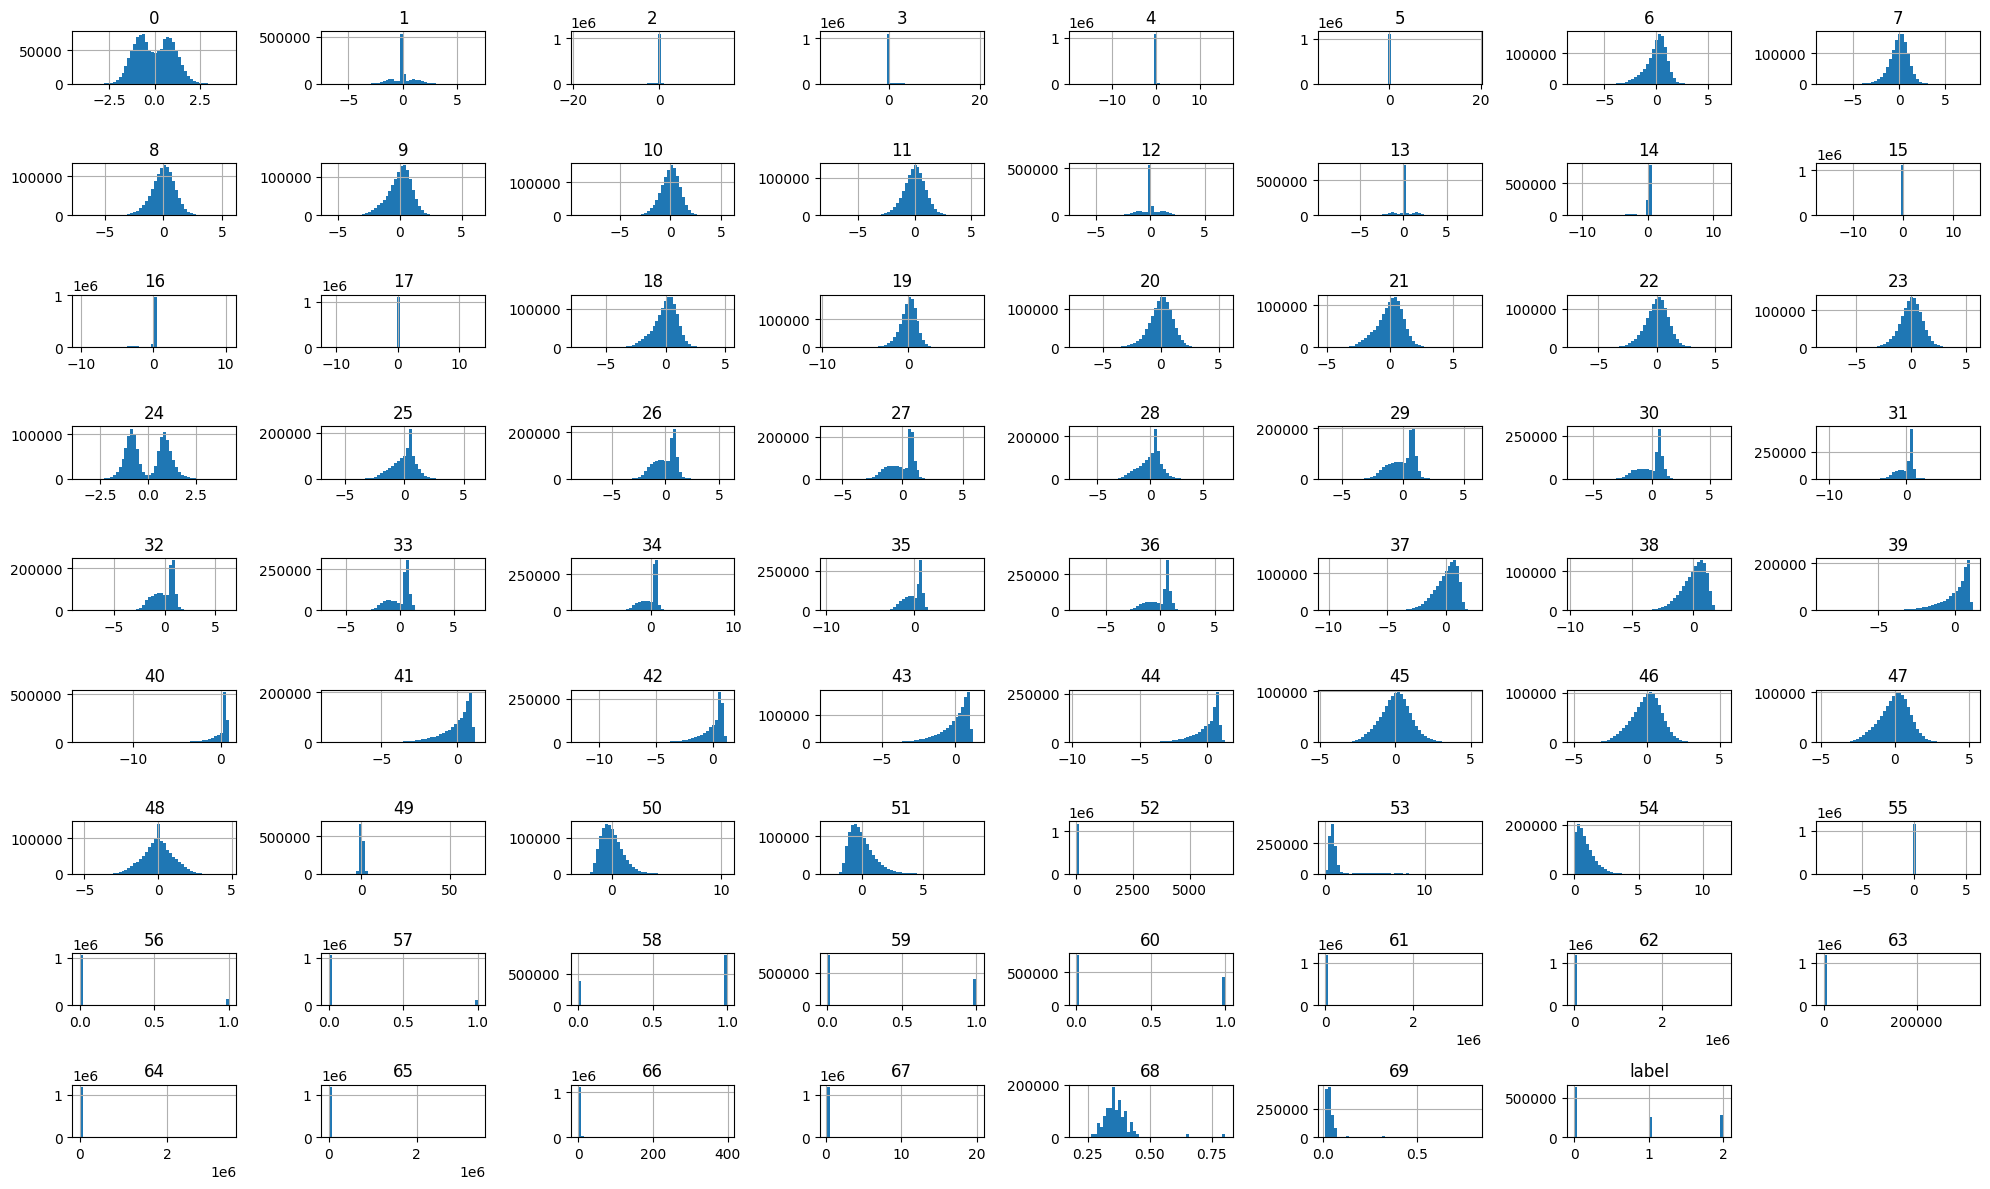

In [6]:

df.iloc[:].hist(figsize=(20,12), bins=50)
plt.grid(True)
plt.tight_layout()
plt.show()


deep analysis on feature dist 
- weird distribution ( that might be useless for training model )
    - Non normal disttribution 
    - heavily skewed 


- removed feature : single value or highly concentration with very high variance 
    - single val : 52 
    - very high kurtosis or skew or std: 55, 61, 62, 63, 64, 65, 67

- binary feature : val = ( 0, 1 )
    56, 57, 58, 59, 60

- edge (remained ): 66

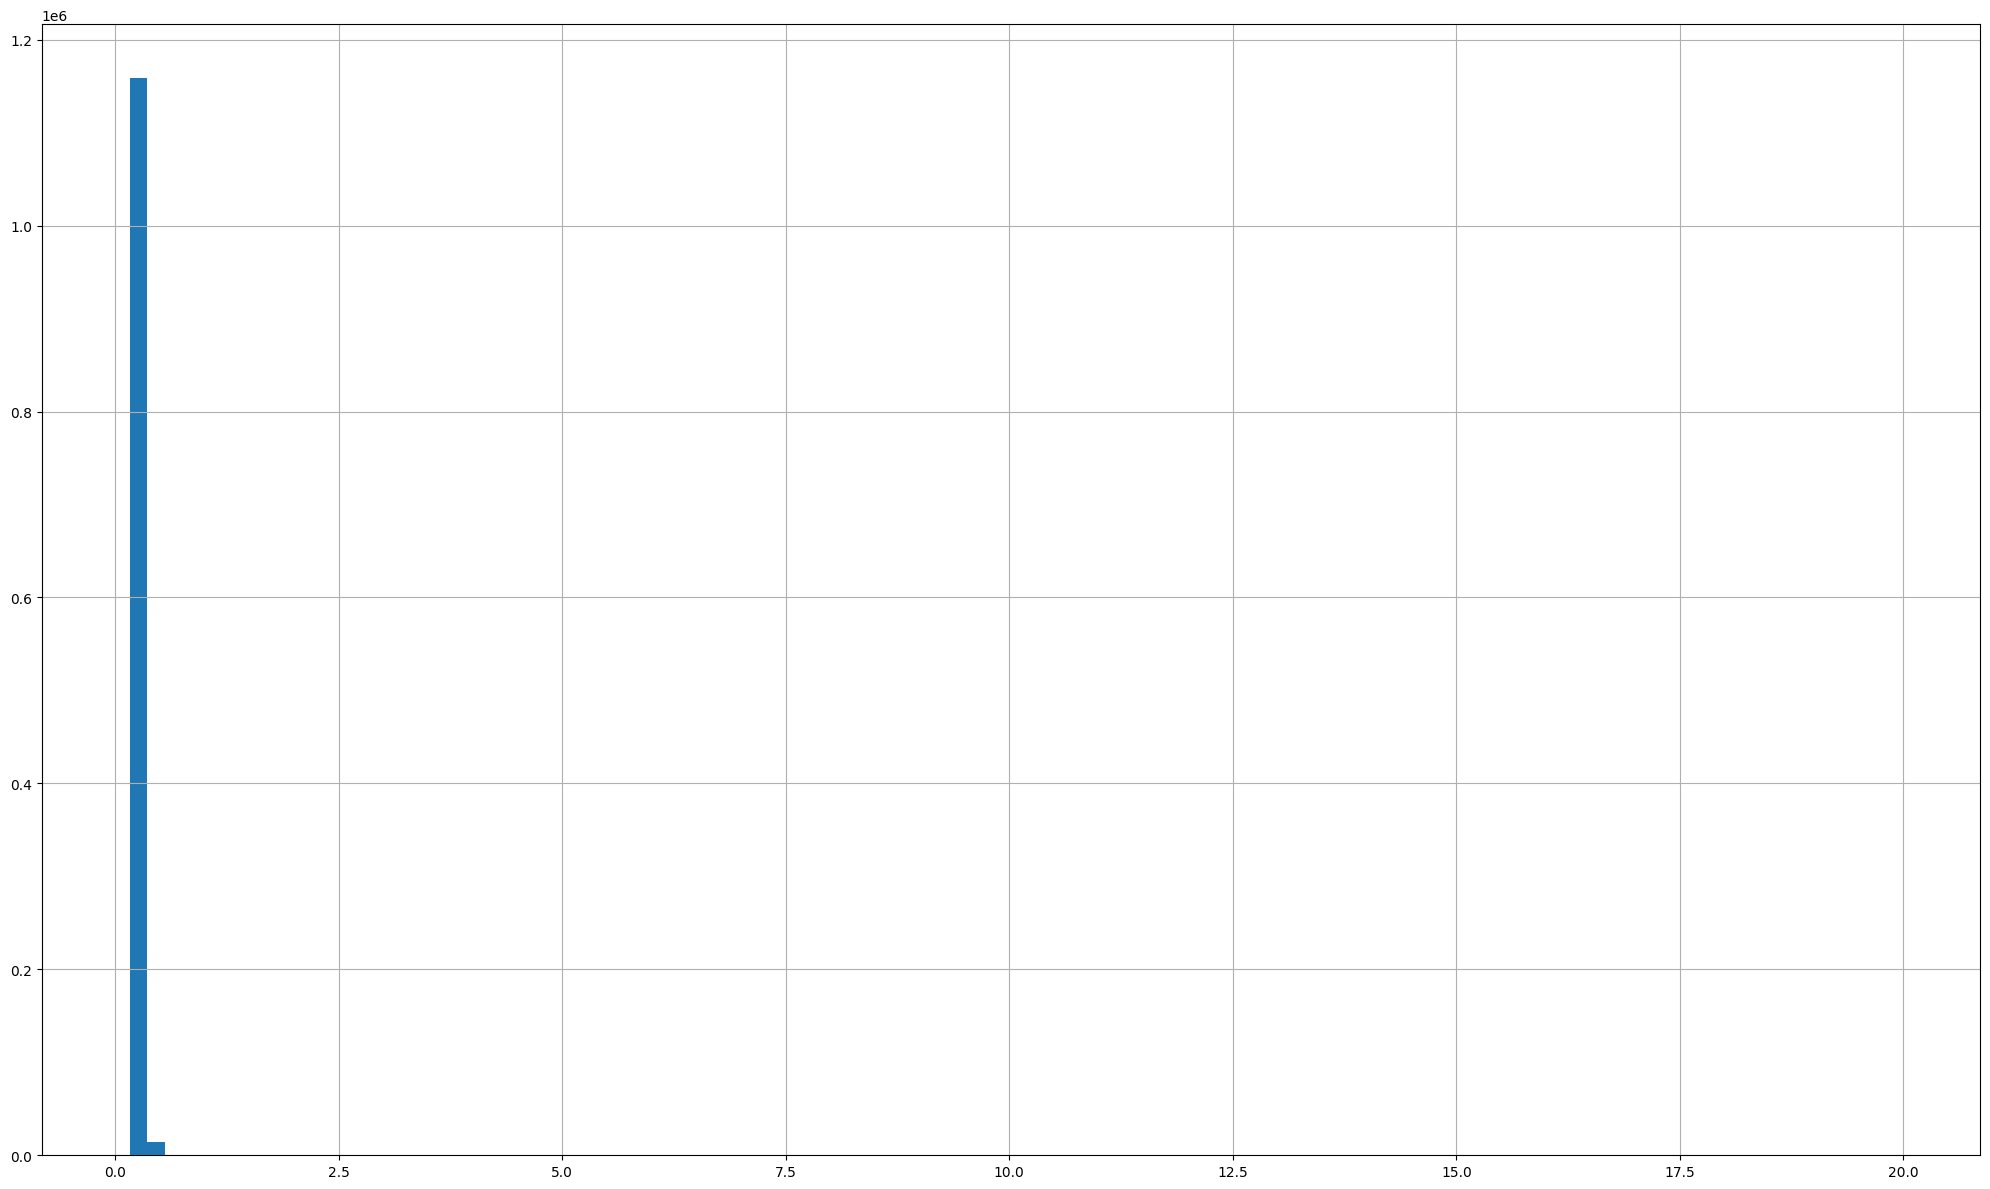

In [7]:

df[67].hist(figsize=(20,12), bins=100)
plt.grid(True)
plt.tight_layout()
plt.show()


In [8]:
print(df[67].var())
print(df[67].mean())
print(df[67].median())
print(df[67].std())
print(df[67].skew())
print(df[67].kurt())
print(df[67].unique())



0.021000967290688455
0.26698494943916834
0.2605633802816901
0.14491710489341297
85.77799056420308
8739.24146552502
[ 0.352       0.29034874  0.28911835  0.32923077  0.29543635  0.31415929
  0.29484219  0.23957544  0.27295492  0.26851852  0.24246877  0.30340333
  0.24468922  0.2552      0.27078385  0.30825838  0.28945074  0.26129827
  0.28112764  0.27061649  0.28665689  0.21143251  0.26188558  0.28255722
  0.27427184  0.27299925  0.25055432  0.24475524  0.23424125  0.24866514
  0.2780303   0.25314582  0.27486712  0.27530364  0.26072874  0.22408537
  0.23175621  0.26056338  0.26849733  0.25365104  0.26554622  0.26738794
  0.24638844  0.23041475  0.20749064  0.24326405  0.20462509  0.22422874
  0.23375653  0.22823702  0.35019973  0.26235741  0.30464072  0.26625861
  0.27641654  0.28430629  0.23699851  0.25151057  0.25390625  0.21541787
  0.264637    0.52033768  0.25804039  0.21801287  0.25034674  0.25613276
  0.27202797  0.29329609  0.2661406   0.26258993  0.29039464  0.28947368
  0.24846

比較相同模型下，移除部分feature model vs. 無移除 model 效果

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.utils.class_weight import compute_class_weight

# Features to remove
features_to_remove = ['52', '55', '61', '62', '63', '64', '65', '67']

# Prepare data
X = df.drop('label', axis=1)
y = df['label']

# Create two datasets: one with all features and one with selected features
X_all = X.copy()
X_selected = X.drop(features_to_remove, axis=1, errors='ignore')  # Ignore non-existent columns

# Split datasets
X_all_train, X_all_test, y_all_train, y_all_test = train_test_split(X_all, y, test_size=0.3, random_state=42)
X_selected_train, X_selected_test, y_selected_train, y_selected_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)

# Standardize data
scaler_all = StandardScaler()
X_all_train_scaled = scaler_all.fit_transform(X_all_train)
X_all_test_scaled = scaler_all.transform(X_all_test)

scaler_selected = StandardScaler()
X_selected_train_scaled = scaler_selected.fit_transform(X_selected_train)
X_selected_test_scaled = scaler_selected.transform(X_selected_test)

# 計算類別權重
unique_classes = np.unique(y_all_train)
class_weights = compute_class_weight(class_weight='balanced', classes=unique_classes, y=y_all_train)
class_weight_dict = dict(zip(unique_classes, class_weights))
print("計算得到的類別權重:", class_weight_dict)

# 初始化SMOTE
smote = SMOTE(random_state=42)

# 創建結果存儲字典
results = {}

# 1. 原始方法（無SMOTE，無加權） - 全部特徵
print("\n1. 評估XGBoost - 全部特徵，無SMOTE，無加權:")
model = XGBClassifier(n_estimators=100, random_state=42)
model.fit(X_all_train_scaled, y_all_train)
all_pred = model.predict(X_all_test_scaled)
all_acc = accuracy_score(y_all_test, all_pred)
print(f"準確率: {all_acc:.4f}")
report_all_original = classification_report(y_all_test, all_pred, output_dict=True)
results['全部特徵_原始'] = {'accuracy': all_acc, 'report': report_all_original}

# 2. 原始方法（無SMOTE，無加權） - 篩選特徵
print("\n2. 評估XGBoost - 篩選特徵，無SMOTE，無加權:")
model = XGBClassifier(n_estimators=100, random_state=42)
model.fit(X_selected_train_scaled, y_selected_train)
selected_pred = model.predict(X_selected_test_scaled)
selected_acc = accuracy_score(y_selected_test, selected_pred)
print(f"準確率: {selected_acc:.4f}")
report_selected_original = classification_report(y_selected_test, selected_pred, output_dict=True)
results['篩選特徵_原始'] = {'accuracy': selected_acc, 'report': report_selected_original}

# 3. SMOTE方法 - 全部特徵
print("\n3. 評估XGBoost - 全部特徵，使用SMOTE:")
X_all_train_scaled_resampled, y_all_train_resampled = smote.fit_resample(X_all_train_scaled, y_all_train)
print(f"SMOTE後的訓練集大小: {X_all_train_scaled_resampled.shape}, 原始大小: {X_all_train_scaled.shape}")
model = XGBClassifier(n_estimators=100, random_state=42)
model.fit(X_all_train_scaled_resampled, y_all_train_resampled)
all_smote_pred = model.predict(X_all_test_scaled)
all_smote_acc = accuracy_score(y_all_test, all_smote_pred)
print(f"準確率: {all_smote_acc:.4f}")
report_all_smote = classification_report(y_all_test, all_smote_pred, output_dict=True)
results['全部特徵_SMOTE'] = {'accuracy': all_smote_acc, 'report': report_all_smote}

# 4. SMOTE方法 - 篩選特徵
print("\n4. 評估XGBoost - 篩選特徵，使用SMOTE:")
X_selected_train_scaled_resampled, y_selected_train_resampled = smote.fit_resample(X_selected_train_scaled, y_selected_train)
print(f"SMOTE後的訓練集大小: {X_selected_train_scaled_resampled.shape}, 原始大小: {X_selected_train_scaled.shape}")
model = XGBClassifier(n_estimators=100, random_state=42)
model.fit(X_selected_train_scaled_resampled, y_selected_train_resampled)
selected_smote_pred = model.predict(X_selected_test_scaled)
selected_smote_acc = accuracy_score(y_selected_test, selected_smote_pred)
print(f"準確率: {selected_smote_acc:.4f}")
report_selected_smote = classification_report(y_selected_test, selected_smote_pred, output_dict=True)
results['篩選特徵_SMOTE'] = {'accuracy': selected_smote_acc, 'report': report_selected_smote}

# 5. 加權方法 - 全部特徵
print("\n5. 評估XGBoost - 全部特徵，使用加權:")
model = XGBClassifier(n_estimators=100, random_state=42)

# 創建樣本權重數組
sample_weights_all = np.ones(len(y_all_train))
for i, label in enumerate(y_all_train):
    sample_weights_all[i] = class_weight_dict[label]

model.fit(X_all_train_scaled, y_all_train, sample_weight=sample_weights_all)
all_weighted_pred = model.predict(X_all_test_scaled)
all_weighted_acc = accuracy_score(y_all_test, all_weighted_pred)
print(f"準確率: {all_weighted_acc:.4f}")
report_all_weighted = classification_report(y_all_test, all_weighted_pred, output_dict=True)
results['全部特徵_加權'] = {'accuracy': all_weighted_acc, 'report': report_all_weighted}

# 6. 加權方法 - 篩選特徵
print("\n6. 評估XGBoost - 篩選特徵，使用加權:")
model = XGBClassifier(n_estimators=100, random_state=42)

# 創建樣本權重數組
sample_weights_selected = np.ones(len(y_selected_train))
for i, label in enumerate(y_selected_train):
    sample_weights_selected[i] = class_weight_dict[label]

model.fit(X_selected_train_scaled, y_selected_train, sample_weight=sample_weights_selected)
selected_weighted_pred = model.predict(X_selected_test_scaled)
selected_weighted_acc = accuracy_score(y_selected_test, selected_weighted_pred)
print(f"準確率: {selected_weighted_acc:.4f}")
report_selected_weighted = classification_report(y_selected_test, selected_weighted_pred, output_dict=True)
results['篩選特徵_加權'] = {'accuracy': selected_weighted_acc, 'report': report_selected_weighted}

# 7. SMOTE+加權方法 - 全部特徵
print("\n7. 評估XGBoost - 全部特徵，使用SMOTE+加權:")
model = XGBClassifier(n_estimators=100, random_state=42)

# 創建SMOTE後的樣本權重數組
sample_weights_all_smote = np.ones(len(y_all_train_resampled))
for i, label in enumerate(y_all_train_resampled):
    sample_weights_all_smote[i] = class_weight_dict[label]

model.fit(X_all_train_scaled_resampled, y_all_train_resampled, sample_weight=sample_weights_all_smote)
all_smote_weighted_pred = model.predict(X_all_test_scaled)
all_smote_weighted_acc = accuracy_score(y_all_test, all_smote_weighted_pred)
print(f"準確率: {all_smote_weighted_acc:.4f}")
report_all_smote_weighted = classification_report(y_all_test, all_smote_weighted_pred, output_dict=True)
results['全部特徵_SMOTE+加權'] = {'accuracy': all_smote_weighted_acc, 'report': report_all_smote_weighted}

# 8. SMOTE+加權方法 - 篩選特徵
print("\n8. 評估XGBoost - 篩選特徵，使用SMOTE+加權:")
model = XGBClassifier(n_estimators=100, random_state=42)

# 創建SMOTE後的樣本權重數組
sample_weights_selected_smote = np.ones(len(y_selected_train_resampled))
for i, label in enumerate(y_selected_train_resampled):
    sample_weights_selected_smote[i] = class_weight_dict[label]

model.fit(X_selected_train_scaled_resampled, y_selected_train_resampled, sample_weight=sample_weights_selected_smote)
selected_smote_weighted_pred = model.predict(X_selected_test_scaled)
selected_smote_weighted_acc = accuracy_score(y_selected_test, selected_smote_weighted_pred)
print(f"準確率: {selected_smote_weighted_acc:.4f}")
report_selected_smote_weighted = classification_report(y_selected_test, selected_smote_weighted_pred, output_dict=True)
results['篩選特徵_SMOTE+加權'] = {'accuracy': selected_smote_weighted_acc, 'report': report_selected_smote_weighted}

# 結果比較表格
accuracy_df = pd.DataFrame({
    '方法': list(results.keys()),
    '準確率': [results[key]['accuracy'] for key in results.keys()],
    '類別0 F1分數': [results[key]['report']['0']['f1-score'] for key in results.keys()],
    '類別1 F1分數': [results[key]['report']['1']['f1-score'] for key in results.keys()],
    '類別2 F1分數': [results[key]['report']['2']['f1-score'] for key in results.keys()],
    '宏平均 F1分數': [results[key]['report']['macro avg']['f1-score'] for key in results.keys()]
})

print("\n結果比較:")
print(accuracy_df)

# 繪製結果比較圖表
plt.figure(figsize=(15, 10))

# 準確率比較
plt.subplot(2, 1, 1)
sns.barplot(x='方法', y='準確率', data=accuracy_df)
plt.title('不同方法的準確率比較')
plt.xticks(rotation=45)
plt.tight_layout()

# F1分數比較
plt.subplot(2, 1, 2)
f1_data = accuracy_df.melt(id_vars=['方法'], 
                          value_vars=['類別0 F1分數', '類別1 F1分數', '類別2 F1分數', '宏平均 F1分數'],
                          var_name='類別', value_name='F1分數')
sns.barplot(x='方法', y='F1分數', hue='類別', data=f1_data)
plt.title('不同方法的F1分數比較')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

# 最佳模型的混淆矩陣
best_method = accuracy_df.loc[accuracy_df['宏平均 F1分數'].idxmax()]['方法']
print(f"\n最佳方法 (基於宏平均F1分數): {best_method}")

# 找到最佳方法對應的預測結果
if best_method == '全部特徵_原始':
    best_y_test, best_pred = y_all_test, all_pred
elif best_method == '篩選特徵_原始':
    best_y_test, best_pred = y_selected_test, selected_pred
elif best_method == '全部特徵_SMOTE':
    best_y_test, best_pred = y_all_test, all_smote_pred
elif best_method == '篩選特徵_SMOTE':
    best_y_test, best_pred = y_selected_test, selected_smote_pred
elif best_method == '全部特徵_加權':
    best_y_test, best_pred = y_all_test, all_weighted_pred
elif best_method == '篩選特徵_加權':
    best_y_test, best_pred = y_selected_test, selected_weighted_pred
elif best_method == '全部特徵_SMOTE+加權':
    best_y_test, best_pred = y_all_test, all_smote_weighted_pred
else:  # 篩選特徵_SMOTE+加權
    best_y_test, best_pred = y_selected_test, selected_smote_weighted_pred

# 繪製最佳模型的混淆矩陣
plt.figure(figsize=(10, 8))
cm = confusion_matrix(best_y_test, best_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'最佳方法的混淆矩陣: {best_method}')
plt.xlabel('預測類別')
plt.ylabel('真實類別')
plt.show()

# 詳細輸出最佳模型的分類報告
print(f"\n最佳方法的分類報告:")
print(classification_report(best_y_test, best_pred))

計算得到的類別權重: {0: 0.6143789677424176, 1: 1.5241925017890845, 2: 1.396150795874664}

1. 評估XGBoost - 全部特徵，無SMOTE，無加權:
準確率: 0.6196

2. 評估XGBoost - 篩選特徵，無SMOTE，無加權:
準確率: 0.6196

3. 評估XGBoost - 全部特徵，使用SMOTE:
SMOTE後的訓練集大小: (1338135, 70), 原始大小: (822122, 70)
準確率: 0.5999

4. 評估XGBoost - 篩選特徵，使用SMOTE:
SMOTE後的訓練集大小: (1338135, 70), 原始大小: (822122, 70)
準確率: 0.5999

5. 評估XGBoost - 全部特徵，使用加權:
準確率: 0.5328

6. 評估XGBoost - 篩選特徵，使用加權:


feature & label corr 
- 直接進行 corr test 
- standardized 再 corr test 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings 
warnings.filterwarnings('ignore')

# 計算特徵與標籤的相關係數
corr_matrix = df.corr()
label_corr = corr_matrix['label'].abs().sort_values(ascending=False)

# 顯示與標籤相關性低於 0.01 的特徵
low_corr_features = label_corr[label_corr < 0.01].index
print(f"fetures with low correlation: {low_corr_features}")





In [ ]:
# 進階方法2：熱力圖顯示相關性矩陣

plt.figure(figsize=(14, 12))
# 選擇相關性最強的前20個特徵（不包括標籤本身）
top_features = label_corr.iloc[1:21].index.tolist() + ['label']
sns.heatmap(corr_matrix.loc[top_features, top_features], annot=True, cmap='coolwarm', fmt='.2f')
plt.title('top 20 features that have strong correlation with label')
plt.tight_layout()
plt.show()



In [ ]:
# 進階方法3：根據相關性閾值分組顯示特徵
correlation_groups = {
    '極強關聯 (>0.5)': label_corr[(label_corr > 0.5) & (label_corr.index != 'label')],
    '強關聯 (0.3-0.5)': label_corr[(label_corr <= 0.5) & (label_corr > 0.3)],
    '中等關聯 (0.1-0.3)': label_corr[(label_corr <= 0.3) & (label_corr > 0.1)],
    '弱關聯 (0.01-0.1)': label_corr[(label_corr <= 0.1) & (label_corr > 0.01)],
    '幾乎無關聯 (<=0.01)': label_corr[label_corr <= 0.01]
}

for group_name, features in correlation_groups.items():
    print(f"\n{group_name}:")
    if len(features) > 0:
        for feature, corr in features.items():
            print(f"  - {feature}: {corr:.4f}")
    else:
        print("  無特徵")



In [ ]:
# 進階方法4：使用互信息(Mutual Information)評估非線性關係
from sklearn.feature_selection import mutual_info_regression

# 確保數據沒有缺失值
X = df.drop('label', axis=1).fillna(0)
y = df['label']

# 計算互信息
discrete_features = [False] * X.shape[1]  # 假設所有特徵都是連續的
mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
mi_df = pd.DataFrame({'特徵': X.columns, '互信息分數': mi_scores})
mi_df = mi_df.sort_values('互信息分數', ascending=False)

print("\n使用互信息評估特徵與標籤的關係（捕捉非線性關係）:")
print(mi_df.head(20))

# 進階方法5：特徵重要性可視化
plt.figure(figsize=(12, 10))
ax = sns.barplot(x='互信息分數', y='特徵', data=mi_df.head(20))
plt.title('基於互信息的前20個重要特徵')
plt.tight_layout()
plt.show()

PCA

In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df.iloc[:, :-1])

pca = PCA(n_components=10)
pca_result = pca.fit_transform(scaled_data)


In [ ]:
pca_result

In [ ]:
# 轉換為 DataFrame
pca_columns = [f'PC{i+1}' for i in range(10)]
df_pca = pd.DataFrame(pca_result, columns=pca_columns)
df_pca['label'] = df['label']

# 顯示前兩個主成分
plt.figure(figsize=(10,6))
sns.scatterplot(x="PC1", y="PC2", hue="label", data=df_pca, palette="Set1")
plt.title("PCA Visualization with 10 Components (First 2 Shown)")
plt.show()

# 顯示 PCA 各主成分的解釋變異比例
plt.figure(figsize=(8,5))
plt.plot(range(1, 11), pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.title("Variance Explained by Each Principal Component")
plt.show()


LDA

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# === 1. 標準化數據 ===
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df.iloc[:, :-1])  # 只對特徵標準化
df_scaled = pd.DataFrame(scaled_data, columns=df.columns[:-1])
df_scaled['label'] = df['label']

# === 2. LDA 降維至 2 維 ===
lda = LDA(n_components=2)
lda_result = lda.fit_transform(df_scaled.iloc[:, :-1], df_scaled['label'])

# === 3. 轉換為 DataFrame，確保格式正確 ===
df_lda = pd.DataFrame(lda_result, columns=['LDA1', 'LDA2'])  # 確保這是一個 DataFrame
df_lda['label'] = df_scaled['label']  # 加入標籤

# === 4. 繪製 LDA 結果的散佈圖 ===
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_lda, x="LDA1", y="LDA2", hue="label", palette="Set1", alpha=0.6)
plt.title("LDA Visualization (Linear Discriminant Analysis)")
plt.xlabel("LDA Component 1")
plt.ylabel("LDA Component 2")
plt.legend(title="Class Label")
plt.show()
